In [2]:
from PIL import Image
from skimage.color import rgb2gray
from skimage.util import random_noise
import numpy as np
import matplotlib.pyplot as plt
import math

In [3]:
tmp = Image.open('MaruTaro.jpg')
tmp.load()
idata = rgb2gray(np.asarray(tmp, dtype=np.float))

In [ ]:
plt.imshow(idata, cmap='gray')

In [ ]:
dft = np.fft.fft2(idata)
magn = np.log(np.abs(dft))
phase = np.angle(dft)

In [ ]:
fig = plt.figure(figsize=(20,10))
fig.add_subplot(1, 2, 1)
plt.imshow(magn, cmap='gray')
fig.add_subplot(1, 2, 2)
plt.imshow(phase, cmap='gray')
plt.show()

In [ ]:
smagn = np.fft.fftshift(magn)
sphase = np.fft.fftshift(phase)

In [ ]:
fig = plt.figure(figsize=(20,10))
fig.add_subplot(1, 2, 1)
plt.imshow(smagn, cmap='gray')
fig.add_subplot(1, 2, 2)
plt.imshow(sphase, cmap='gray')
plt.show()

In [4]:
P = idata.shape[0] * 2
Q = idata.shape[1] * 2

In [5]:
pidata = np.pad(idata, (int(P/4),int(Q/4)), 'constant', constant_values=(0,0))

In [6]:
pdft = np.fft.fftshift(np.fft.fft2(pidata))

In [25]:
psmagn = np.log(np.abs(pdft))

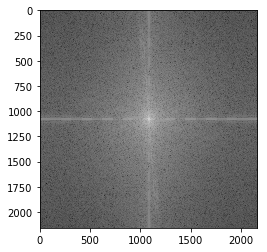

In [61]:
plt.imshow(psmagn, cmap='gray')

In [26]:
def ideal_low_pass_filter(img):
    xcenter = int(img.shape[0] / 2)
    ycenter = int(img.shape[1] / 2)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if img[i][j] <= img[xcenter][ycenter]:
                img[i][j] = 1
            else:
                img[i][j] = 0
    return img


In [28]:
lpsmagn = ideal_low_pass_filter(psmagn)

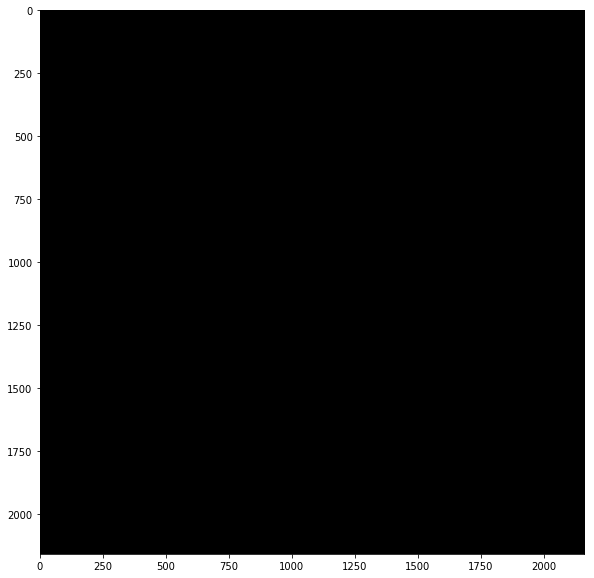

In [29]:
plt.figure(figsize=(20,10))
plt.imshow(lpsmagn, cmap='gray')

In [30]:
res = np.real(np.fft.ifft2(pdft * lpsmagn))
res = res[int(P/4) : int(3*P/4), int(Q/4) : int(3*Q/4)]

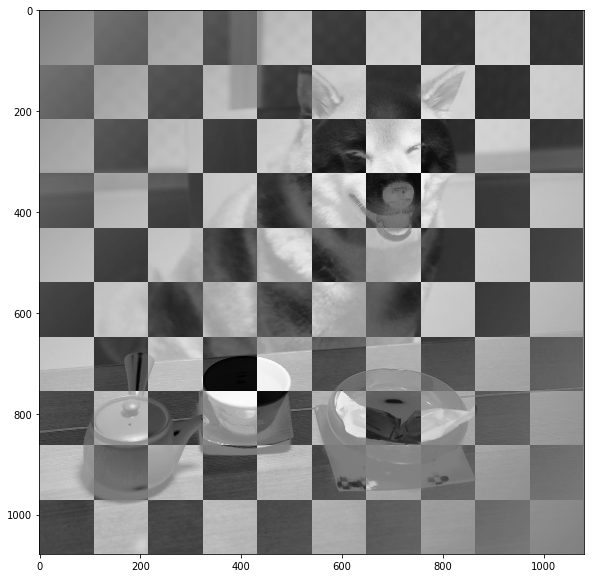

In [31]:
plt.figure(figsize=(20,10))
plt.imshow(res, cmap='gray')